# Основы Asyncio

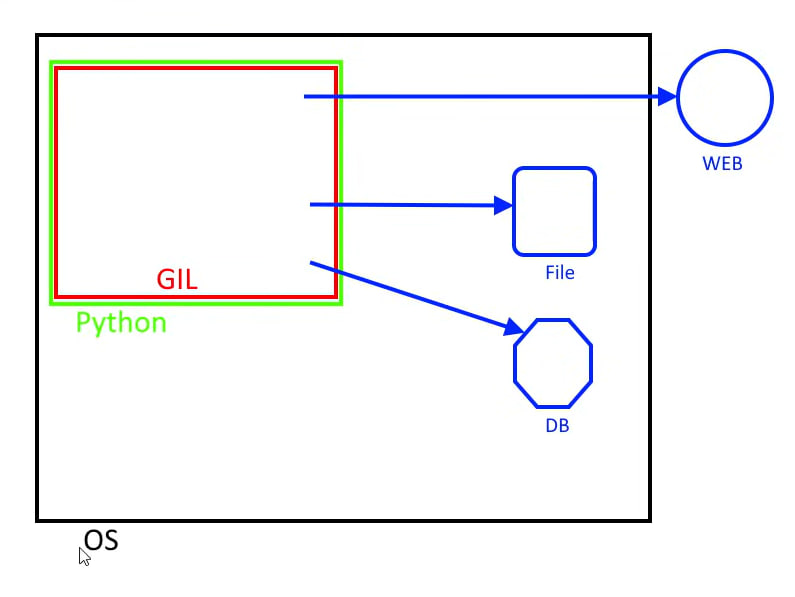

Давайте мы не будем ждать ответа от сервера, а пока просто будем выполнять задачи другие. Потом как только вернули данные, то к ним вернемся и начнем с ними работать

Что должен уметь делать python для реализации асинхронности:

-   1) Необходима функция которая умеет вставать на паузу - она должна выполнить заказ на эти данные, сама встать на паузу, но при этом дать другим функциям возможность дальше выполнять задачи

-   2) Необходим явный флыг/сигнал и для нас который читает код и для интерпретатора что конкретна функция умеет это делать

-   3) Нам нужно в коде явная возможность указать что именно здесь мы встаем на паузу, то есть не условно вся функция встает на паузу. Там есть конкретное место где функция встает на паузу

-   4) Необходим некий механизм, который контролирует все эти процессы (очередь, список)

То есть в итоге вместо времени x + y + z, мы получим время равное макс(x, y, z), то есть одной из этих функций

### Генератор в Python

Мы можем вспомнить, что у нас есть объект генератор в python, который тоже умеет вставать на паузу.

**Генератор в Python** — это функция, которая возвращает значения по одному с помощью yield, не сохраняя всё сразу в памяти.

*Генератор = ленивый итератор (yield вместо return)*

Генератор возвращает не значения сразу, а объект-генератор, из которого можно доставать значения по одному.

Пример:

In [4]:
def gen():
    yield 1
    yield 2
    yield 3

g = gen()
print(g)

# Вернёт примерно: <generator object gen at 0x...>

<generator object gen at 0x0000013F19F76B00>


Как работать 👇

1️⃣ Через цикл (самый частый способ)

In [5]:
for x in gen():
    print(x)

1
2
3


2️⃣ Через next()

In [6]:
g = gen()

print(next(g))  # 1
print(next(g))  # 2
print(next(g))  # 3

1
2
3


3️⃣ Превратить в список

In [7]:
list(gen())

[1, 2, 3]

**Очень кратко:**

функция с yield → возвращает generator object

значения получаем через for / next() / list()

### Какой же итог, зачем нам генератор?

А прикол в том, что наши ассинхронные функции работают точно так же

1) Они в о первых возвращают некий объект, с которым мы можем работать
2) Они умею вставать на паузу и продолжать свое выполнение

То есть асинхронные объекты работают точно так же как генераторы

In [16]:
import asyncio
import aiohttp
import requests

В нашем случае ключевым словом выступает **async**

In [22]:
async def example():
    print(100)

Объект генератор

In [25]:
gen()

<generator object gen at 0x0000013F1ABAC700>

Объект корутина

In [23]:
example()

<coroutine object example at 0x0000013F1ABAC400>

Внутри как мы видим ничего не выполняется (не получили 100), она нам дает объект с которым надо работать

### Второй флаг
А где именно внутри функции мы встаем на паузу?

Это **await**

In [ ]:
import time

async def one():
    print("Start one")
    await asyncio.sleep(1) # флаг- "я встаю на паузу, пусть поработает кто то другой"
    print("Stop one")

async def two():
    print("Start two")
    await asyncio.sleep(2) # здесь мы используем не обычные time sleep блокировку, а именно asyncio
    # await time.sleep(2) # так писать нельзя
    print("Stop two")

async def three():
    print("Start three")
    await asyncio.sleep(3)
    print("Stop three")


async def main():
    asyncio.create_task(one())
    asyncio.create_task(one())
    await asyncio.create_task(one())


start = time.time()
asyncio.run(main())
print(time.time() - start)


### Популярные ошибки:
1) Создание корутины, но использование как обычной функции
2) Не использование await внутри корутины